In [33]:
import numpy as np
import matplotlib.pyplot as plt


In [34]:
def lade_abschnittsdatei(dateiname):
    daten = {}
    aktueller_header = None

    with open(dateiname, "r", encoding="utf-8") as f:
        for zeile in f:
            zeile = zeile.strip()

            # Header erkennen: beginnt mit #
            if zeile.startswith("#"):
                aktueller_header = zeile[1:].strip()
                daten[aktueller_header] = []
                continue

            # Leere Zeilen ignorieren
            if not zeile:
                continue

            # Datenzeile einlesen
            werte = [float(x) for x in zeile.split()]
            daten[aktueller_header].append(werte)

    return daten


# Beispiel:
datei = "[0.05,3.6]x[2.0,36.0]_with50x50R50.txt"
R_ = int(datei[32:34])
print(R_)
abschnitte = lade_abschnittsdatei(datei)

# Ausgabe prüfen
plots = []
for name, block in abschnitte.items():
    print(f"{name}: {len(block)} Zeilen, {len(block[0]) if block else 0} Spalten")
    plots.append(np.array(block))



50
Lyap1: 50 Zeilen, 50 Spalten
Lyap2: 50 Zeilen, 50 Spalten
Lyap3: 50 Zeilen, 50 Spalten
Sigma: 50 Zeilen, 50 Spalten
Beta: 50 Zeilen, 50 Spalten


In [35]:
Lyap1 = plots[0]
Lyap1[Lyap1<0] = 0
Lyap2 = plots[1]
Lyap3 = plots[2]
Sigma_ = plots[3]
Beta_ = plots[4]
print(len(Beta_))

50


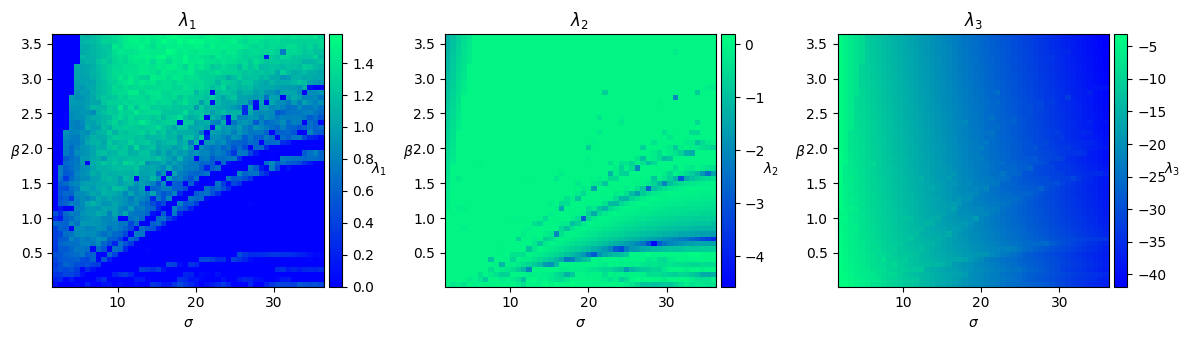

In [36]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
Title = [
    r'$\lambda_1$ ',
    r'$\lambda_2$ ',
    r'$\lambda_3$'
]
ep = 0.09
for i in range(0,len(Lyap1)):
  for k in range(0,len(Lyap1)):
    if (abs(Lyap1[i][k]) < ep) and (abs(Lyap2[i][k]) < ep):
      if abs(Lyap1[i][k]) < abs(Lyap2[i][k]):
        Lyap1[i][k] = 0
      else:
        Lyap2[i][k] = 0
    elif abs(Lyap1[i][k]) < ep:
      Lyap1[i][k]= 0
    elif abs(Lyap2[i][k]) < ep:
      Lyap2[i][k]= 0
Colors = ['winter', 'winter', 'winter']
fig, axes = plt.subplots(1,3, figsize=(12,3.5))
for i, (ax,lyap) in enumerate(zip(axes,[Lyap1, Lyap2, Lyap3]), start=1):
    im = axes[i-1].pcolormesh(Sigma_, Beta_, lyap, cmap=Colors[i-1])
    ax.set_title(Title[i-1])
    ax.set_xlabel(r"$\sigma$")
    ax.set_ylabel(r"$\beta$", rotation = 0)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    cbar.set_label(rf'$\lambda_{i}$',rotation=0)

plt.tight_layout()
plt.show()

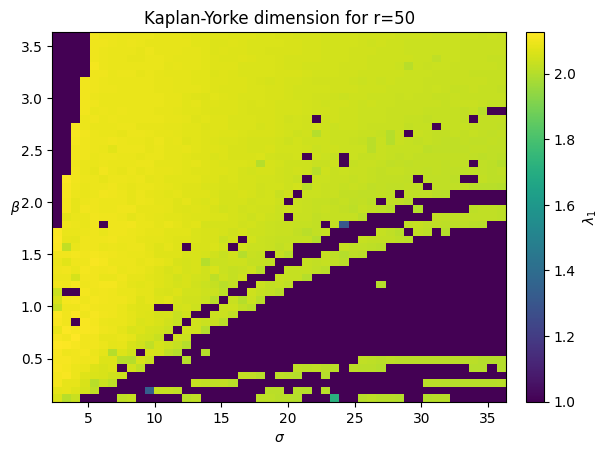

In [37]:
def kaplan_yorke_sorted(Lyap1, Lyap2, Lyap3):
    """
    Compute the Kaplan–Yorke dimension from three equally-shaped arrays
    of already-sorted Lyapunov exponents λ1 ≥ λ2 ≥ λ3.
    """
    λ1 = Lyap1
    λ2 = Lyap2
    λ3 = Lyap3

    # Cumulative sums
    S1 = λ1
    S2 = λ1 + λ2

    # Initialize result array
    D = np.zeros_like(λ1)

    # Case j = 0 → λ1 < 0  (D=0, already default)
    j1 = S1 >= 0
    j2 = S2 >= 0

    # --- j = 1 -----------------------------------------
    mask1 = j1 & (~j2)
    D[mask1] = 1 + S1[mask1] / np.abs(λ2[mask1])

    # --- j = 2 -----------------------------------------
    mask2 = j2
    # Avoid division by zero:
    zero_mask = (λ3 == 0) & mask2
    nonzero_mask = (λ3 != 0) & mask2

    D[zero_mask] = 2
    D[nonzero_mask] = 2 + S2[nonzero_mask] / np.abs(λ3[nonzero_mask])
    return D

Sigma_ , Beta_ = Sigma_[1:,1:], Beta_[1:,1:]
im0 = plt.pcolormesh(Sigma_,Beta_,Dky, cmap='viridis', shading='auto', label=r'$\lambda_1$')
plt.xlabel(r'$\sigma$',rotation= 0)
plt.ylabel(r'$\beta$',rotation= 0)
plt.colorbar(im0 , label=r'$\lambda_1$',fraction=0.046, pad=0.04)
plt.title(f'Kaplan-Yorke dimension for r={R_}')
plt.show()





In [38]:
for i in range(len(Dky)):
  for f in range(len(Dky)):
    if Dky[i][f] <= 2:
      if Dky[i][f] > 1:
        print(Dky[i][f],Sigma_[i][f], Beta_[i][f],Lyap1[i+1][f+1],Lyap2[i+1][f+1])

1.3333333333333333 9.63 0.19 0.21 -0.63
1.7142857142857144 23.51 0.12 0.1 -0.14
1.3055555555555556 24.2 1.79 0.11 -0.36
